In [1]:
#imports

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = '#5D7963'
#warnings
import warnings
warnings.filterwarnings("ignore")

## EDA

#### Load the data

In [60]:
df = pd.read_csv('../csv_data/food_access_data.csv')

In [61]:
df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [62]:
df.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=147)

In [63]:
df.dtypes

CensusTract        int64
State             object
County            object
Urban              int64
Pop2010            int64
                  ...   
TractAIAN        float64
TractOMultir     float64
TractHispanic    float64
TractHUNV        float64
TractSNAP        float64
Length: 147, dtype: object

In [64]:
df.isna().sum()

CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        4
TractOMultir     4
TractHispanic    4
TractHUNV        4
TractSNAP        4
Length: 147, dtype: int64

In [65]:
df.shape

(72531, 147)

In [66]:
# Handle missing values
# For numeric columns, you can replace missing values with the mean or median
numeric_cols = ['Pop2010', 'OHU2010', 'NUMGQTRS', 'PCTGQTRS', 'PovertyRate', 'MedianFamilyIncome']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [67]:
# For categorical columns, you can replace missing values with the mode
categorical_cols = ['Urban', 'GroupQuartersFlag', 'LILATracts_1And10', 'LILATracts_halfAnd10', 'HUNVFlag', 'LowIncomeTracts']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [68]:
df.describe()

,CensusTract,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7.253100e+04,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,...,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000
mean,2.782573e+10,0.760626,4256.739022,1609.191821,0.007114,110.086005,2.707807,0.128125,0.279150,0.112228,...,555.197113,3082.337157,536.756160,202.327685,7.445655,40.152316,387.664649,695.979277,143.709736,201.753182
std,1.581647e+10,0.426704,1955.987626,725.676046,0.084046,443.859366,9.569347,0.334231,0.448584,0.315649,...,351.805391,1796.364560,889.118109,435.878339,45.186581,177.378696,529.349680,1119.472739,232.738869,185.760089
min,1.001020e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.212708e+10,1.000000,2899.000000,1108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,320.000000,1848.000000,43.000000,17.000000,0.000000,7.000000,85.000000,88.000000,36.000000,67.000000
50%,2.712979e+10,1.000000,4011.000000,1525.000000,0.000000,7.000000,0.181130,0.000000,0.000000,0.000000,...,497.000000,2914.000000,160.000000,58.000000,1.000000,15.000000,186.000000,243.000000,82.000000,152.000000
75%,4.103900e+10,1.000000,5330.500000,2021.000000,0.000000,64.000000,1.564241,0.000000,1.000000,0.000000,...,718.000000,4118.000000,610.000000,189.000000,5.000000,33.000000,448.000000,751.000000,168.500000,282.000000
max,5.604595e+10,1.000000,37452.000000,16043.000000,1.000000,19496.000000,100.000000,1.000000,1.000000,1.000000,...,17271.000000,28983.000000,16804.000000,10485.000000,3491.000000,9009.000000,8839.000000,15420.000000,6059.000000,2175.000000


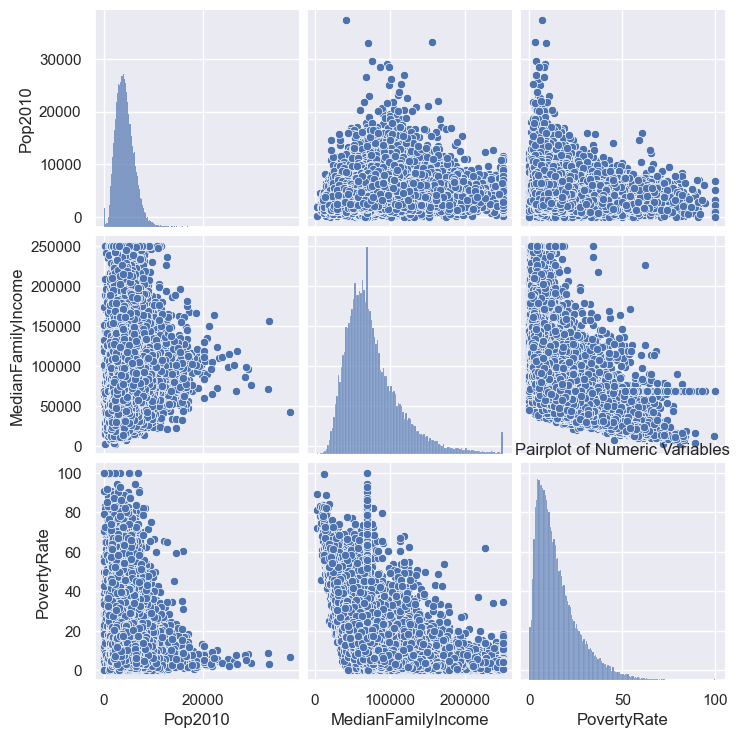

In [69]:
# Pairplot to visualize pairwise relationships in the dataset
sns.pairplot(df[['Pop2010', 'MedianFamilyIncome', 'PovertyRate']])
plt.title('Pairplot of Numeric Variables')
plt.show()

### Feature Engineering

In [70]:
# Update the aggregation to include new features
county_aggregation = df.groupby(['State', 'County']).agg({
    'CensusTract': 'first',  # Capture the first CensusTract value for each county
    'Pop2010': 'sum', # Total population per county
    'OHU2010': 'sum', # Total occupied housing units per county
    'PovertyRate': 'mean',  # Average poverty rate per county
    'MedianFamilyIncome': 'mean',  # Average median family income per county
    'LowIncomeTracts': 'sum',  # Sum of low-income tracts per county
    'LILATracts_1And10': 'sum',  # Sum of low-income and low-access tracts per county
    'LALOWI1_10': 'sum',  # Total low-income population with low access at 1 & 10 miles
    'TractSNAP': 'sum',  # Total housing units receiving SNAP benefits
    'TractHUNV': 'sum',  # Total housing units without a vehicle
    'lapop1': 'sum',  # Population beyond 1 mile from a supermarket
    'lapop10': 'sum',  # Population beyond 10 miles from a supermarket
    'TractKids': 'sum',  # Total count of children age 0-17
    'TractSeniors': 'sum',  # Total count of seniors age 65+
    'TractWhite': 'sum',  # Total count of White population
    'TractBlack': 'sum',  # Total count of Black or African American population
    'TractAsian': 'sum',  # Total count of Asian population
    'TractHispanic': 'sum',  # Total count of Hispanic or Latino population
}).reset_index()

# Add percentage columns for households without a vehicle and demographic breakdowns
county_aggregation['PctHUNV'] = (county_aggregation['TractHUNV'] / county_aggregation['OHU2010']) * 100
county_aggregation['PctKids'] = (county_aggregation['TractKids'] / county_aggregation['Pop2010']) * 100
county_aggregation['PctSeniors'] = (county_aggregation['TractSeniors'] / county_aggregation['Pop2010']) * 100
county_aggregation['PctWhite'] = (county_aggregation['TractWhite'] / county_aggregation['Pop2010']) * 100
county_aggregation['PctBlack'] = (county_aggregation['TractBlack'] / county_aggregation['Pop2010']) * 100
county_aggregation['PctAsian'] = (county_aggregation['TractAsian'] / county_aggregation['Pop2010']) * 100
county_aggregation['PctHispanic'] = (county_aggregation['TractHispanic'] / county_aggregation['Pop2010']) * 100

# Preview the updated county aggregation
county_aggregation.head()

,State,County,CensusTract,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LowIncomeTracts,LILATracts_1And10,LALOWI1_10,...,TractBlack,TractAsian,TractHispanic,PctHUNV,PctKids,PctSeniors,PctWhite,PctBlack,PctAsian,PctHispanic
0,Alabama,Autauga County,1001020100,54571,20221,16.130786,69337.500000,5,5,7105.688803,...,9643.0,474.0,1310.0,5.889916,26.777959,11.995382,78.530721,17.670558,0.868593,2.400542
1,Alabama,Baldwin County,1003010100,182265,73180,11.845546,72665.741935,7,4,14465.970897,...,17105.0,1348.0,7992.0,3.696365,22.987408,16.771185,85.673607,9.384687,0.739582,4.384824
2,Alabama,Barbour County,1005950100,27457,9820,29.299325,44792.444444,8,4,2864.635946,...,12875.0,107.0,1387.0,8.645621,21.906982,14.236807,48.002331,46.891503,0.389700,5.051535
3,Alabama,Bibb County,1007010001,22915,7953,12.193524,60645.500000,1,0,102.170243,...,5047.0,22.0,406.0,5.155287,22.696923,12.681650,75.849880,22.024875,0.096007,1.771765
4,Alabama,Blount County,1009050101,57322,21578,14.850748,60437.666667,3,0,1440.046734,...,761.0,117.0,4626.0,3.967003,24.608353,14.722096,92.578766,1.327588,0.204110,8.070200


Distribution of Median Family Income across Counties

Relationship between Poverty Rates and Low-Access Indicators across Counties

Low-Income, Low-Access tracts by State

In [71]:
county_aggregation.to_csv('../csv_data/county.csv')

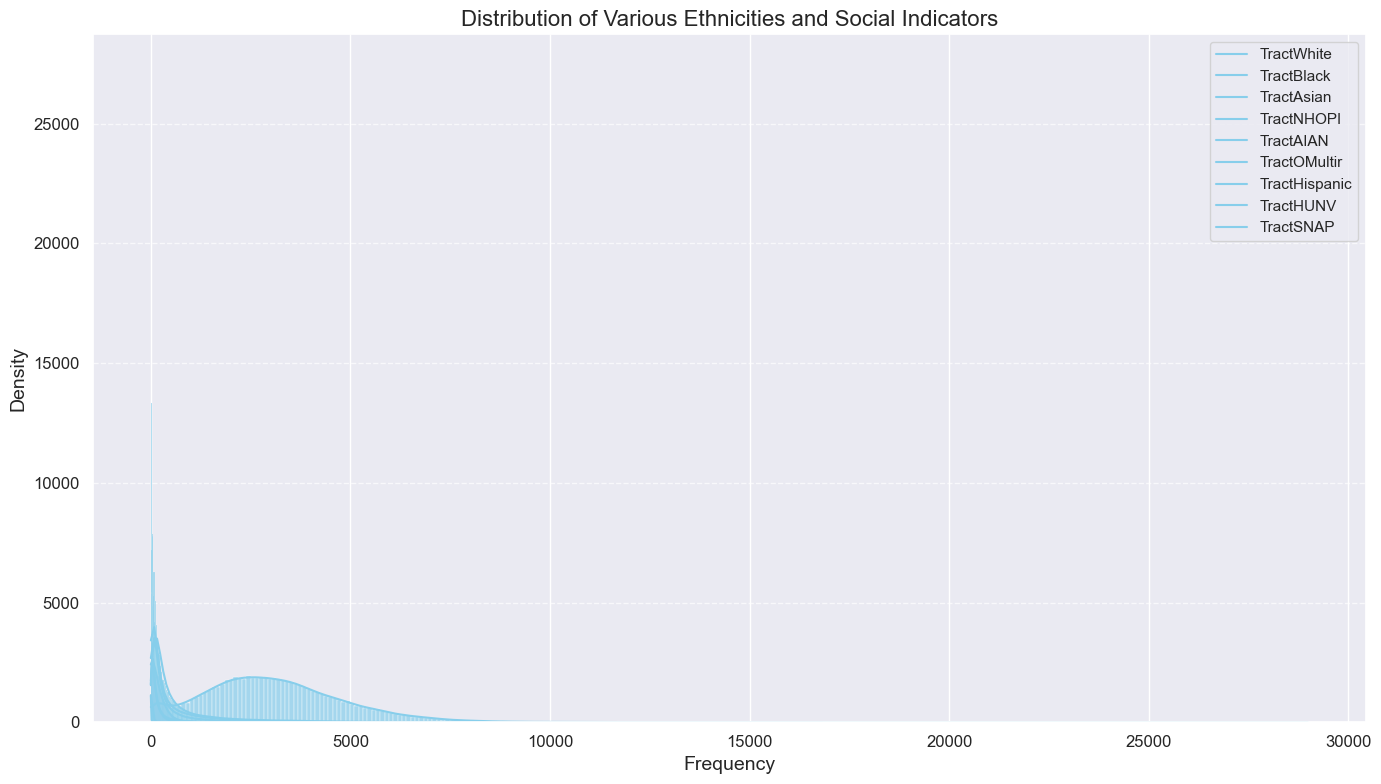

In [72]:
sns.set(style="darkgrid")  # Set the style for seaborn plots

plt.figure(figsize=(14, 8))  # Set the figure size

columns_to_plot = [
    'TractWhite',
    'TractBlack',
    'TractAsian',
    'TractNHOPI',
    'TractAIAN',
    'TractOMultir',
    'TractHispanic',
    'TractHUNV',
    'TractSNAP'
]

# Loop through each column and create a histogram subplot
for column in columns_to_plot:
    sns.histplot(df[column], kde=True, color='skyblue', alpha=0.7)  # Plot histogram
    plt.title('Distribution of Various Ethnicities and Social Indicators', fontsize=16)  # Add title
    plt.xlabel('Frequency', fontsize=14)  # Label x-axis
    plt.ylabel('Density', fontsize=14)  # Label y-axis
    plt.xticks(fontsize=12)  # Adjust font size of x-axis ticks
    plt.yticks(fontsize=12)  # Adjust font size of y-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

plt.legend(columns_to_plot, loc='upper right')  # Add legend
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show();

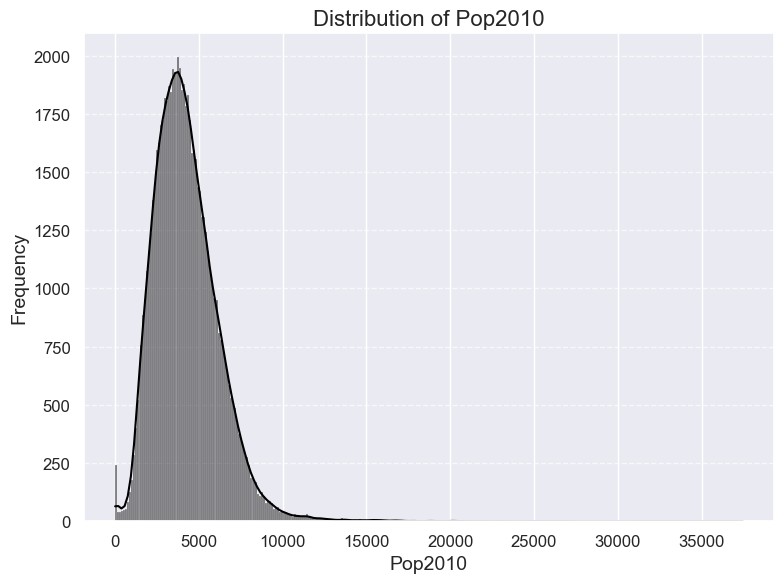

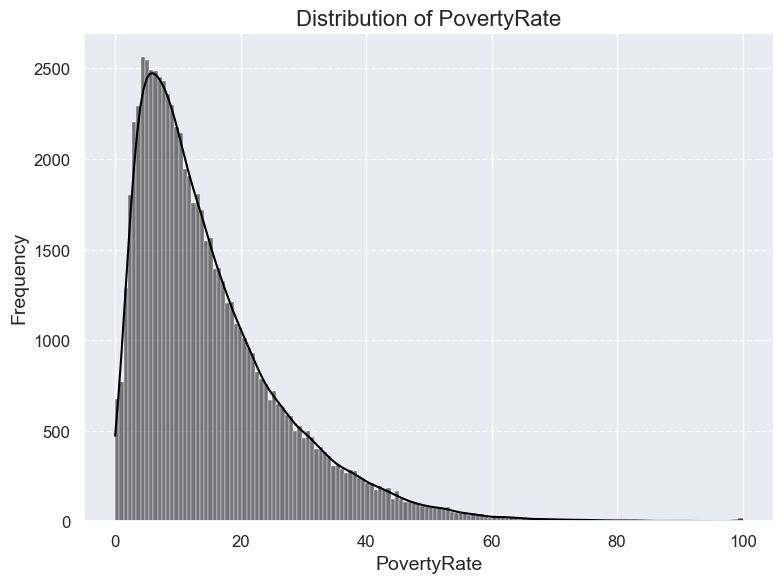

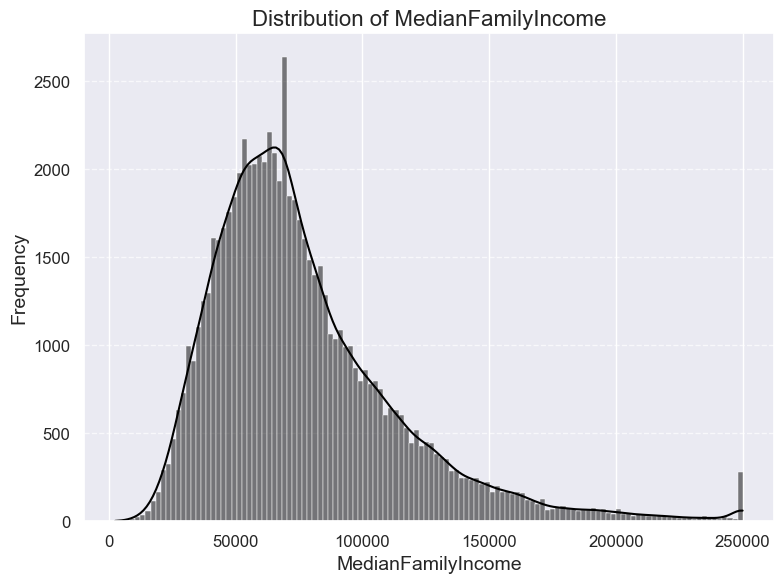

In [73]:
sns.set(style="darkgrid")  # Set the style for seaborn plots

for column in ['Pop2010', 'PovertyRate', 'MedianFamilyIncome']:
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.histplot(df[column], kde=True, color='black')  # Change color to salmon
    plt.title(f'Distribution of {column}', fontsize=16)  # Increase font size for title
    plt.xlabel(column, fontsize=14)  # Label x-axis with column name
    plt.ylabel('Frequency', fontsize=14)  # Label y-axis
    plt.xticks(fontsize=12)  # Adjust font size of x-axis ticks
    plt.yticks(fontsize=12)  # Adjust font size of y-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()

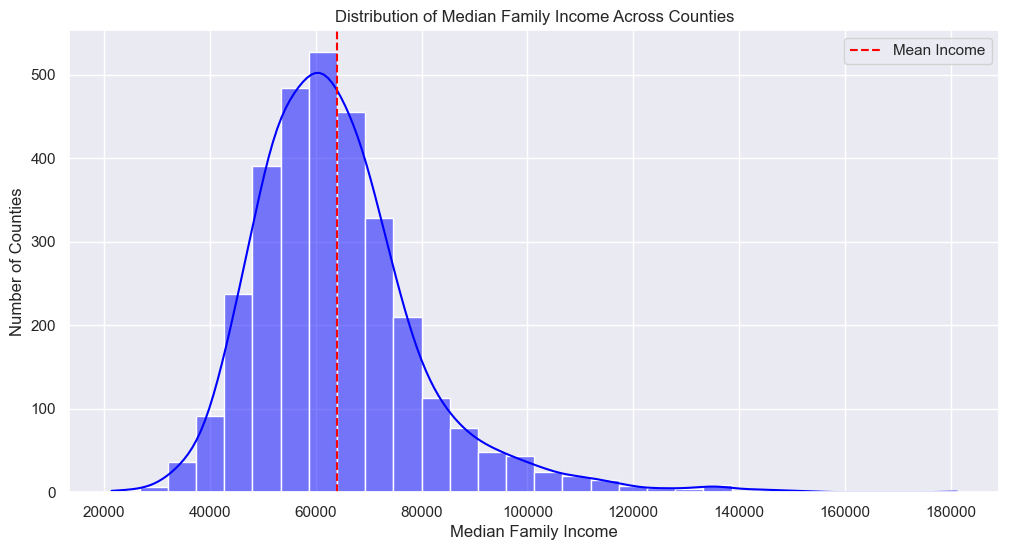

In [74]:
# Set the style of the plots
sns.set_style("darkgrid")

# Visualization 1: Distribution of Median Family Income across Counties
plt.figure(figsize=(12, 6))
sns.histplot(county_aggregation['MedianFamilyIncome'], bins=30, kde=True, color='blue')
plt.title('Distribution of Median Family Income Across Counties')
plt.xlabel('Median Family Income')
plt.ylabel('Number of Counties')
plt.axvline(county_aggregation['MedianFamilyIncome'].mean(), color='red', linestyle='--', label='Mean Income')
plt.legend()
plt.show()

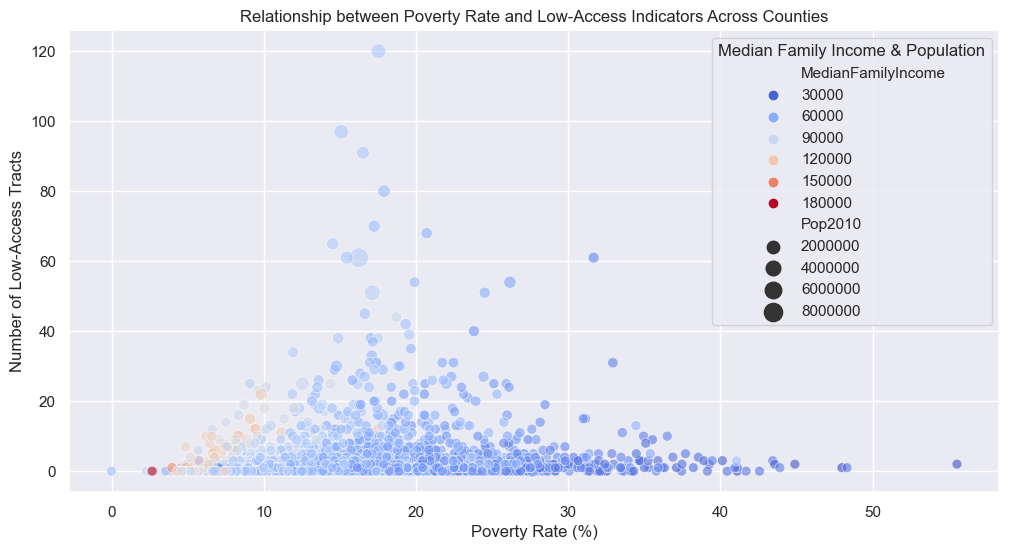

In [75]:
# Visualization 2: Relationship between Poverty Rates and Low-Access Indicators across Counties
plt.figure(figsize=(12, 6))
sns.scatterplot(data=county_aggregation, x='PovertyRate', y='LILATracts_1And10', hue='MedianFamilyIncome', size='Pop2010', sizes=(50, 200), alpha=0.6, palette="coolwarm")
plt.title('Relationship between Poverty Rate and Low-Access Indicators Across Counties')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Number of Low-Access Tracts')
plt.legend(title='Median Family Income & Population', loc='upper right')
plt.grid(True)
plt.show()

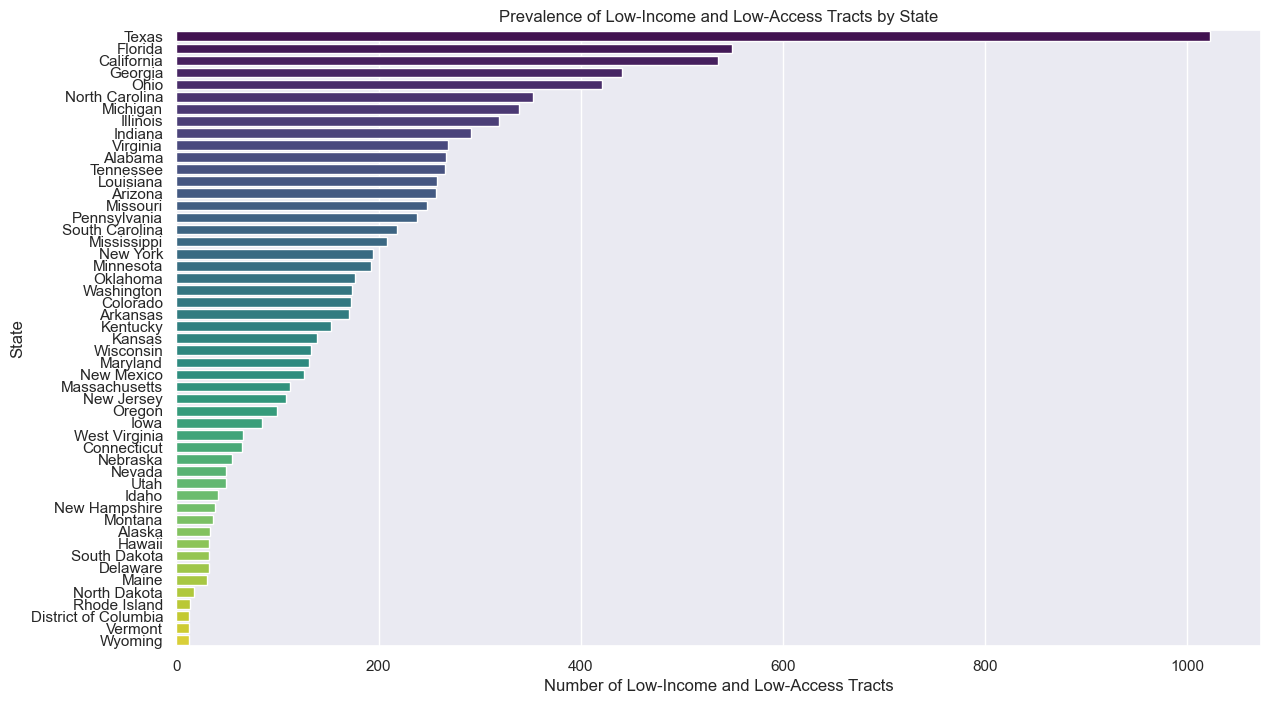

In [76]:
# Visualization 3: Prevalence of Low-Income and Low-Access Tracts by State

# Aggregating by state for this visualization
state_grouped = county_aggregation.groupby('State').agg({
    'LowIncomeTracts': 'sum',
    'LILATracts_1And10': 'sum'
}).reset_index()

plt.figure(figsize=(14, 8))
state_grouped = state_grouped.sort_values('LILATracts_1And10', ascending=False)
sns.barplot(data=state_grouped, x='LILATracts_1And10', y='State', palette='viridis')
plt.title('Prevalence of Low-Income and Low-Access Tracts by State')
plt.xlabel('Number of Low-Income and Low-Access Tracts')
plt.ylabel('State')
plt.show();

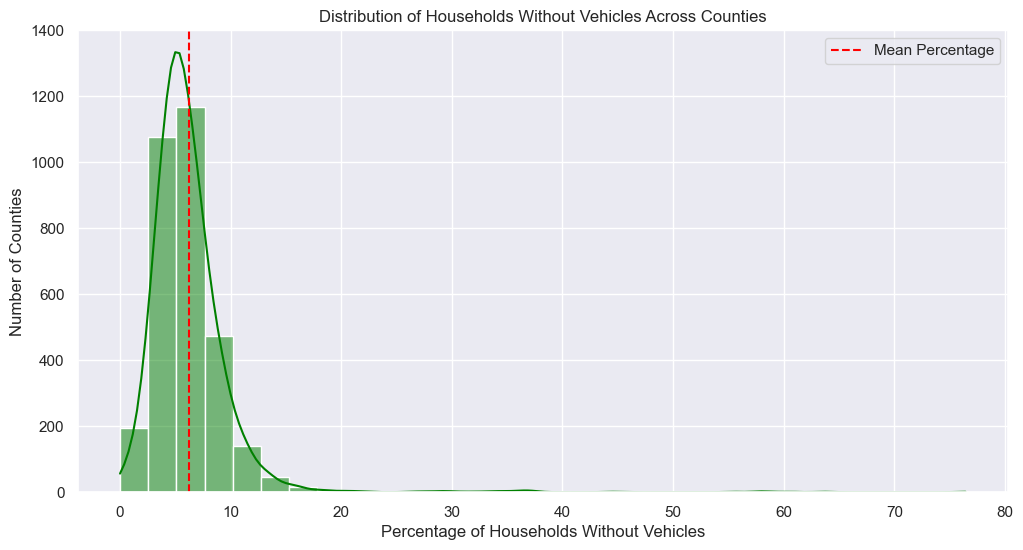

In [77]:
# Visualization 4: Percentage of Households Without Vehicles Across Counties
plt.figure(figsize=(12, 6))
sns.histplot(county_aggregation['PctHUNV'], bins=30, kde=True, color='green')
plt.title('Distribution of Households Without Vehicles Across Counties')
plt.xlabel('Percentage of Households Without Vehicles')
plt.ylabel('Number of Counties')
plt.axvline(county_aggregation['PctHUNV'].mean(), color='red', linestyle='--', label='Mean Percentage')
plt.legend()
plt.show()

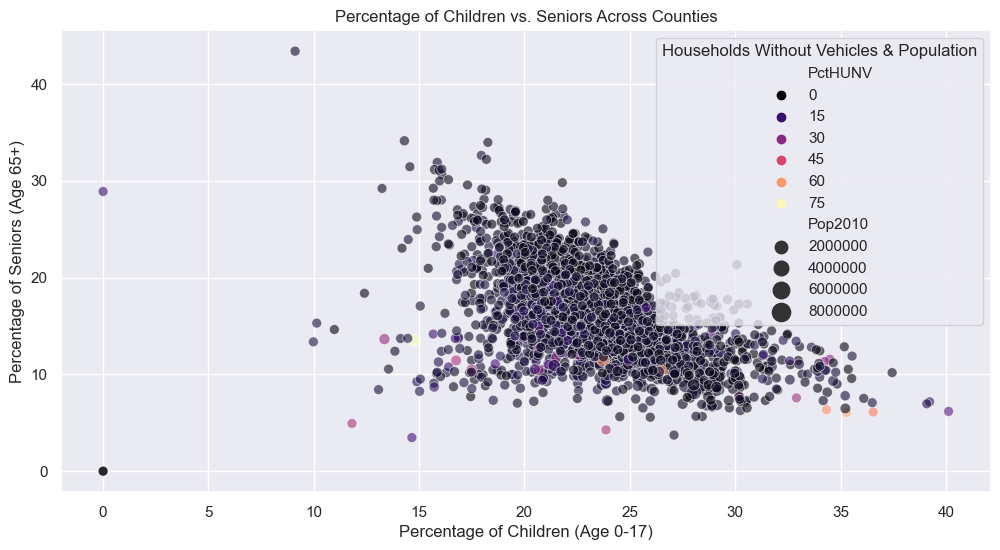

In [78]:
# Visualization 5: Demographic Breakdown - Children and Seniors
plt.figure(figsize=(12, 6))
sns.scatterplot(data=county_aggregation, x='PctKids', y='PctSeniors', hue='PctHUNV', size='Pop2010', sizes=(50, 200), palette="magma", alpha=0.6)
plt.title('Percentage of Children vs. Seniors Across Counties')
plt.xlabel('Percentage of Children (Age 0-17)')
plt.ylabel('Percentage of Seniors (Age 65+)')
plt.legend(title='Households Without Vehicles & Population', loc='upper right')
plt.grid(True)
plt.show()

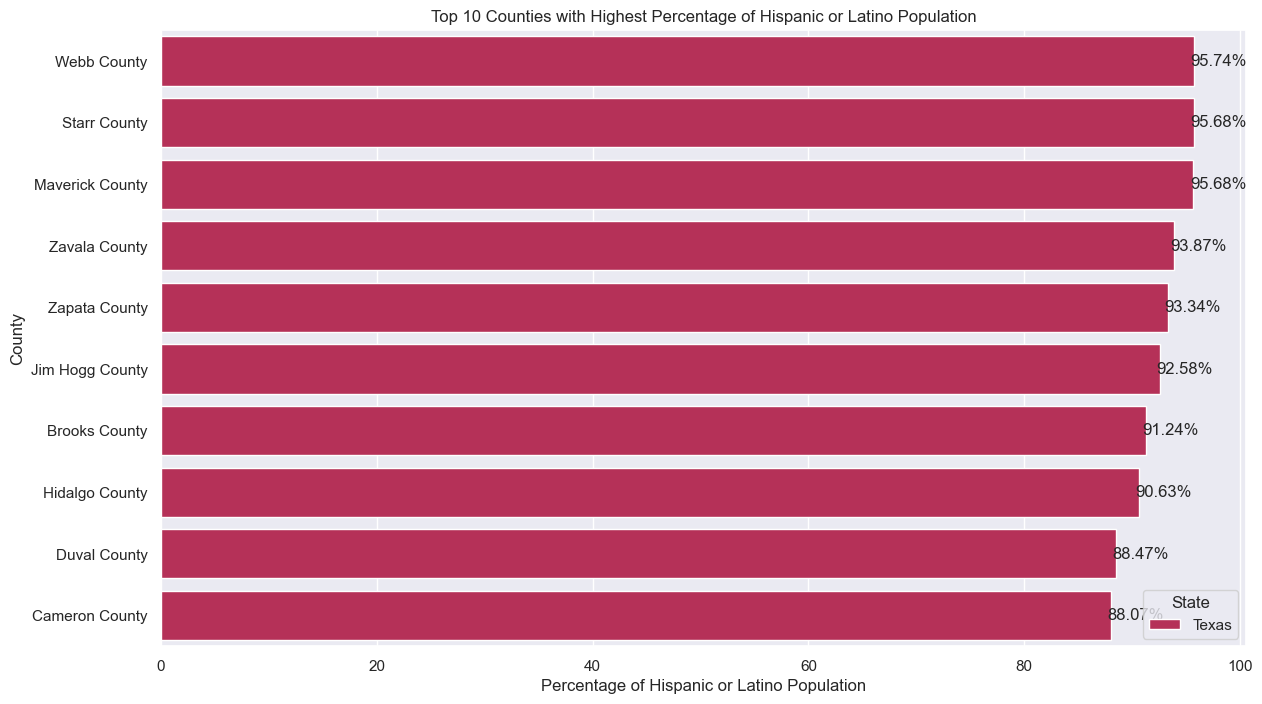

In [79]:
# Visualization 6: Racial/Ethnic Composition - Percentage of Hispanic or Latino Population
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=county_aggregation.sort_values('PctHispanic', ascending=False).head(10), x='PctHispanic', y='County', hue='State', dodge=False, palette='rocket')
plt.title('Top 10 Counties with Highest Percentage of Hispanic or Latino Population')
plt.xlabel('Percentage of Hispanic or Latino Population')
plt.ylabel('County')
plt.legend(title='State', loc='lower right')

# Annotate each bar with its corresponding percentage
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', ((p.get_width() + 1), p.get_y() + p.get_height()/2), ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.show()


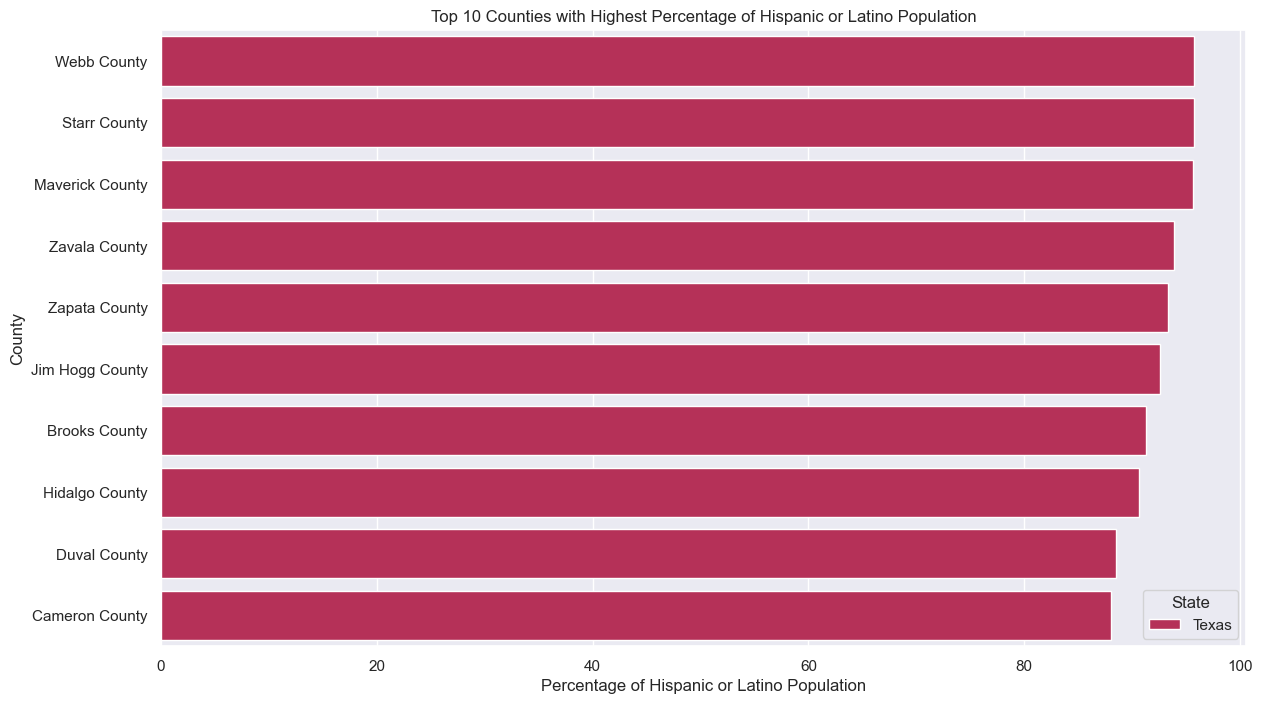

In [80]:
# Visualization 6: Racial/Ethnic Composition - Percentage of Hispanic or Latino Population
plt.figure(figsize=(14, 8))
sns.barplot(data=county_aggregation.sort_values('PctHispanic', ascending=False).head(10), x='PctHispanic', y='County', hue='State', dodge=False, palette='rocket')
plt.title('Top 10 Counties with Highest Percentage of Hispanic or Latino Population')
plt.xlabel('Percentage of Hispanic or Latino Population')
plt.ylabel('County')
plt.legend(title='State', loc='lower right')
plt.show()

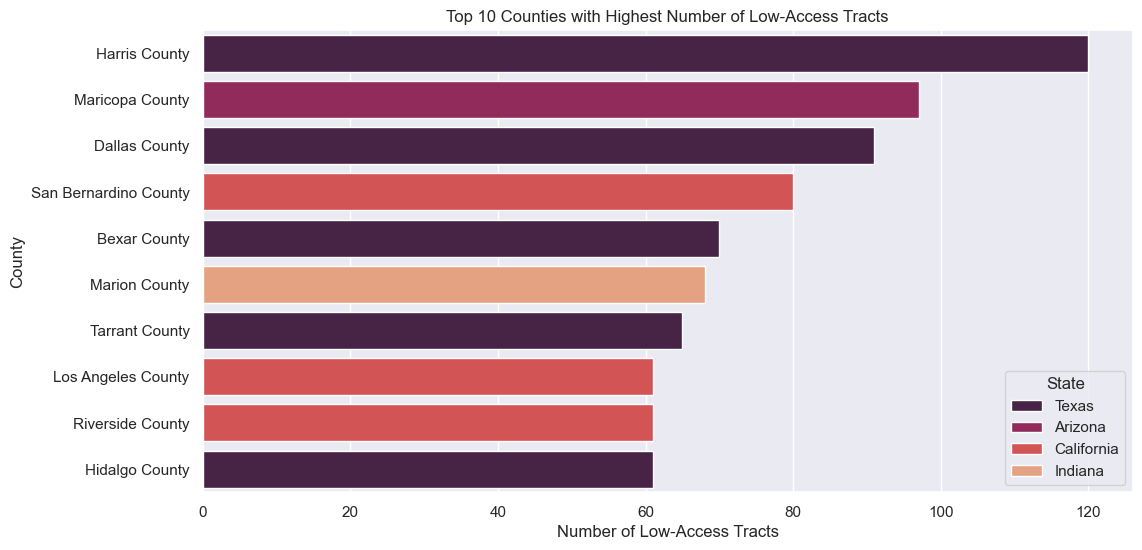

In [81]:
# Identifying counties with the highest and lowest number of low-access tracts
highest_low_access = county_aggregation.sort_values('LILATracts_1And10', ascending=False).head(10)
lowest_low_access = county_aggregation.sort_values('LILATracts_1And10', ascending=True).head(10)

# Visualization 7: Highest Low-Access Tracts
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_low_access, x='LILATracts_1And10', y='County', hue='State', dodge=False, palette='rocket')
plt.title('Top 10 Counties with Highest Number of Low-Access Tracts')
plt.xlabel('Number of Low-Access Tracts')
plt.ylabel('County')
plt.legend(title='State', loc='lower right')
plt.show()

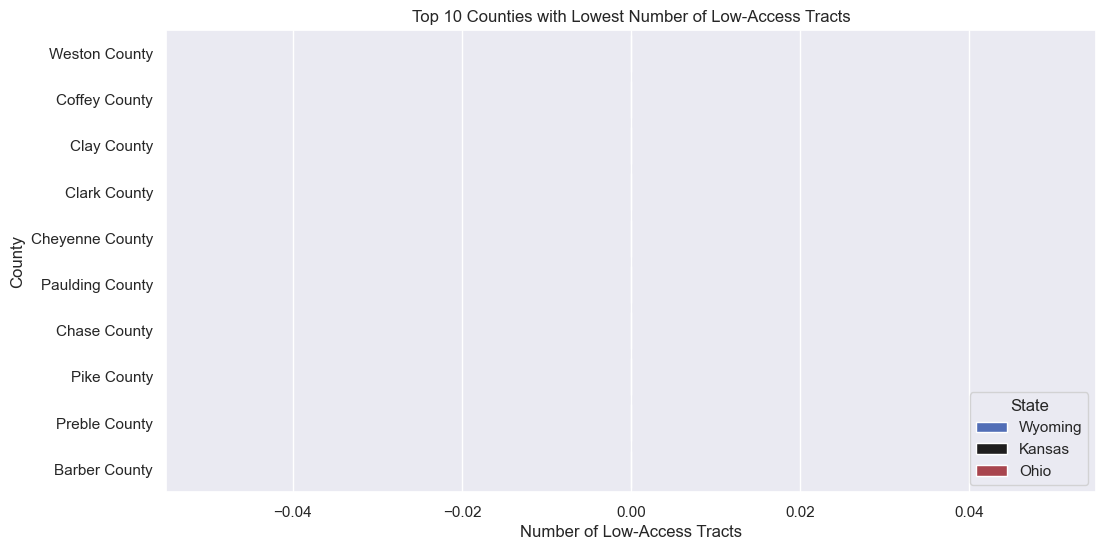

In [82]:
# Visualization 8: Lowest Low-Access Tracts
plt.figure(figsize=(12, 6))
sns.barplot(data=lowest_low_access, x='LILATracts_1And10', y='County', hue='State', dodge=False, palette='icefire')
plt.title('Top 10 Counties with Lowest Number of Low-Access Tracts')
plt.xlabel('Number of Low-Access Tracts')
plt.ylabel('County')
plt.legend(title='State', loc='lower right')
plt.show()

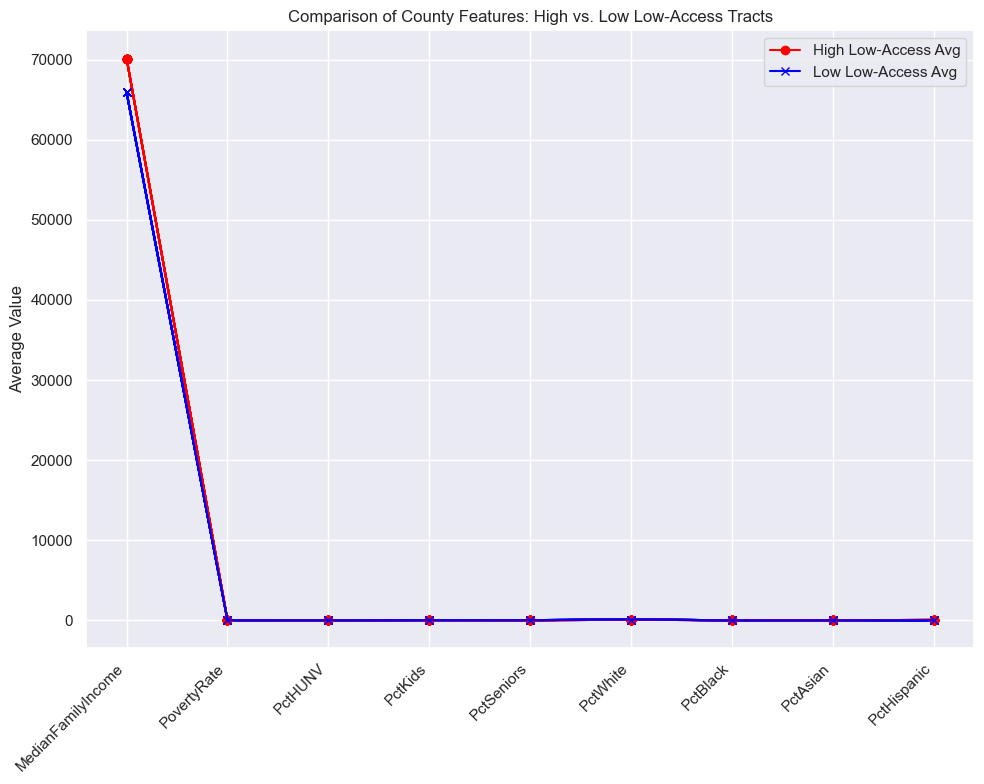

In [83]:
# Summary statistics for counties with the highest and lowest number of low-access tracts
features = ['MedianFamilyIncome', 'PovertyRate', 'PctHUNV', 'PctKids', 'PctSeniors', 'PctWhite', 'PctBlack', 'PctAsian', 'PctHispanic']
summary_high = highest_low_access[features].mean().reset_index()
summary_low = lowest_low_access[features].mean().reset_index()

summary_high.columns = ['Feature', 'High Low-Access Avg']
summary_low.columns = ['Feature', 'Low Low-Access Avg']

# Merging the summaries for comparison
summary_comparison = pd.merge(summary_high, summary_low, on='Feature')

# Visualization: Comparing Features of High vs. Low Low-Access Tracts Counties
plt.figure(figsize=(10, 8))
for feature in features:
    plt.plot(summary_comparison['Feature'], summary_comparison['High Low-Access Avg'], label='High Low-Access Avg', color='red', marker='o')
    plt.plot(summary_comparison['Feature'], summary_comparison['Low Low-Access Avg'], label='Low Low-Access Avg', color='blue', marker='x')
    plt.legend(["High Low-Access Avg", "Low Low-Access Avg"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Average Value')
    plt.title('Comparison of County Features: High vs. Low Low-Access Tracts')
    plt.tight_layout()

plt.show()

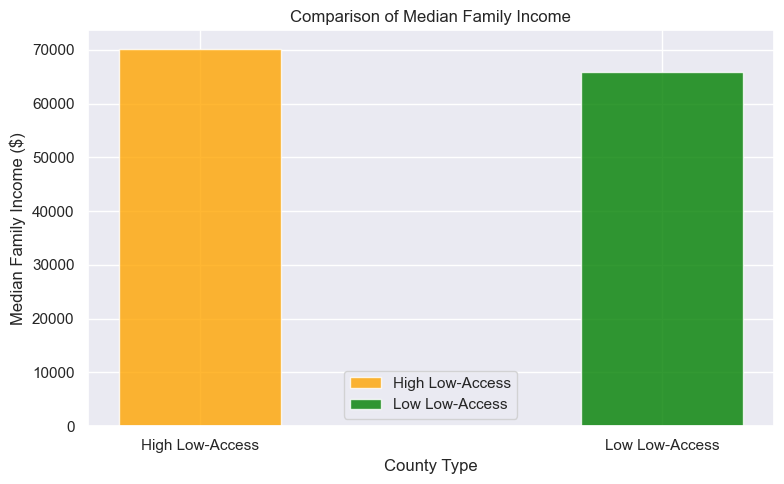

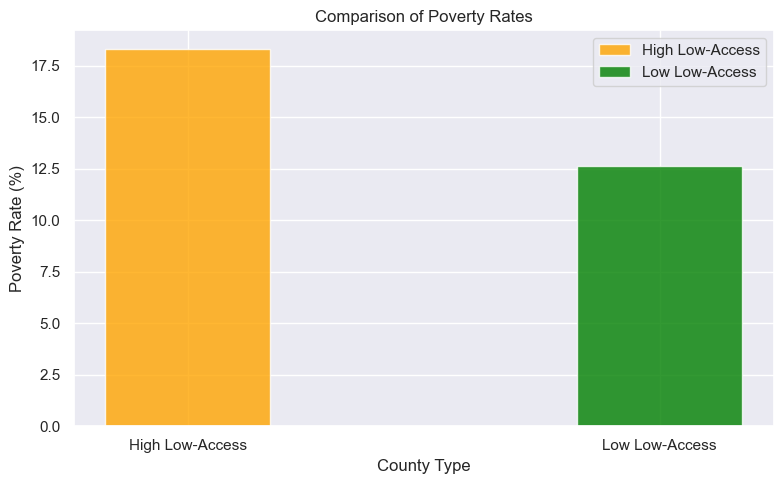

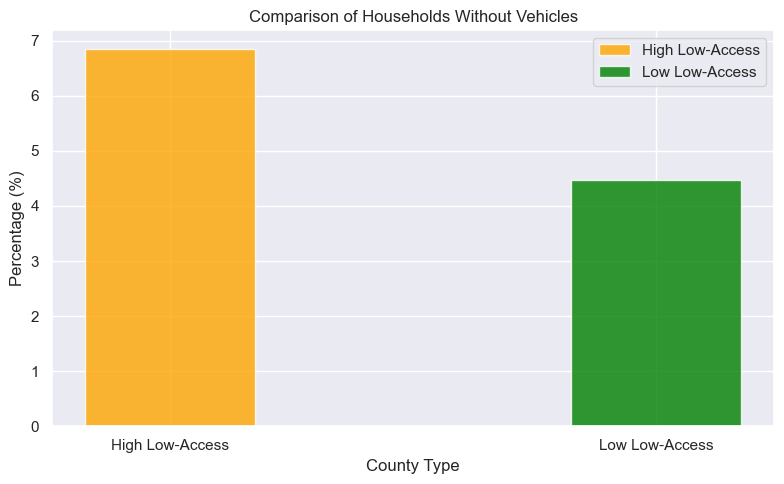

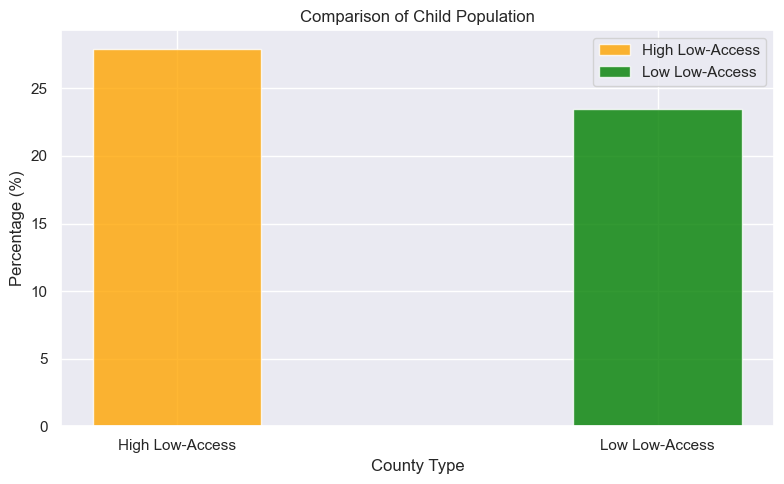

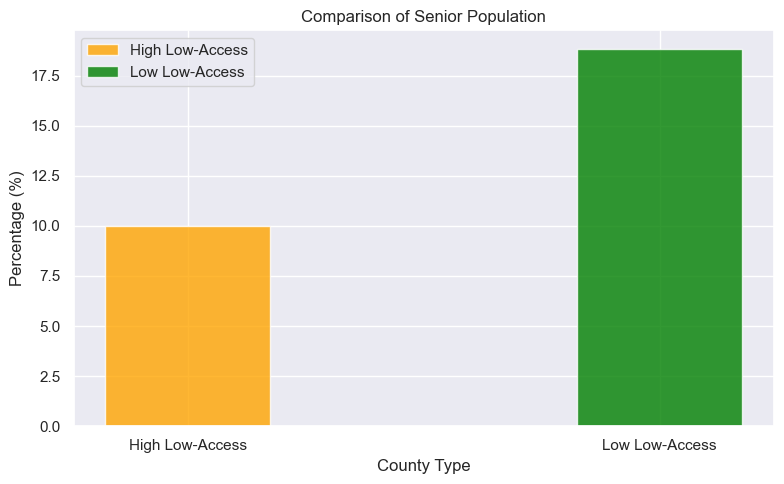

In [84]:
# Let's create individual visualizations for a clearer comparison between the features of high vs. low low-access tract counties.

# Function to create side-by-side bar plots for comparison
def plot_feature_comparison(feature, title, y_label):
    fig, ax = plt.subplots(figsize=(8, 5))
    index = np.arange(2)
    bar_width = 0.35
    opacity = 0.8

    values = [summary_comparison[summary_comparison['Feature'] == feature]['High Low-Access Avg'].values[0],
              summary_comparison[summary_comparison['Feature'] == feature]['Low Low-Access Avg'].values[0]]

    rects1 = plt.bar(index, values, bar_width,
                     alpha=opacity,
                     color=['orange', 'green'],
                     label=['High Low-Access', 'Low Low-Access'])

    plt.xlabel('County Type')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(index, ['High Low-Access', 'Low Low-Access'])
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot comparisons for selected features
plot_feature_comparison('MedianFamilyIncome', 'Comparison of Median Family Income', 'Median Family Income ($)')
plot_feature_comparison('PovertyRate', 'Comparison of Poverty Rates', 'Poverty Rate (%)')
plot_feature_comparison('PctHUNV', 'Comparison of Households Without Vehicles', 'Percentage (%)')
plot_feature_comparison('PctKids', 'Comparison of Child Population', 'Percentage (%)')
plot_feature_comparison('PctSeniors', 'Comparison of Senior Population', 'Percentage (%)')

## Visualization

#### Objectives:

Gain insights into the distribution of key variables within the county_aggregation dataset.
Determine correlations between food desert indicators and socio-economic factors.
Methods:

#### Descriptive Statistics:
Calculate central tendencies, dispersion, and shape of distributions for key variables.
#### Visualizations:
Utilize histograms to visualize the distribution of individual variables.
Create heatmaps to display correlation matrices.
Generate violin plots to compare distributions between food desert and non-food desert areas.
Use bar plots for categorical variables.
#### Hypothesis:
There exists a significant correlation between poverty rates and the classification of areas as food deserts.

In [85]:
county = pd.read_csv('../csv_data/county.csv')

In [86]:
county.head(2)

,Unnamed: 0,State,County,CensusTract,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LowIncomeTracts,LILATracts_1And10,...,TractBlack,TractAsian,TractHispanic,PctHUNV,PctKids,PctSeniors,PctWhite,PctBlack,PctAsian,PctHispanic
0,0,Alabama,Autauga County,1001020100,54571,20221,16.130786,69337.500000,5,5,...,9643.0,474.0,1310.0,5.889916,26.777959,11.995382,78.530721,17.670558,0.868593,2.400542
1,1,Alabama,Baldwin County,1003010100,182265,73180,11.845546,72665.741935,7,4,...,17105.0,1348.0,7992.0,3.696365,22.987408,16.771185,85.673607,9.384687,0.739582,4.384824


In [87]:
county.isna().sum()

Unnamed: 0            0
State                 0
County                0
CensusTract           0
Pop2010               0
OHU2010               0
PovertyRate           0
MedianFamilyIncome    0
LowIncomeTracts       0
LILATracts_1And10     0
LALOWI1_10            0
TractSNAP             0
TractHUNV             0
lapop1                0
lapop10               0
TractKids             0
TractSeniors          0
TractWhite            0
TractBlack            0
TractAsian            0
TractHispanic         0
PctHUNV               0
PctKids               0
PctSeniors            0
PctWhite              0
PctBlack              0
PctAsian              0
PctHispanic           0
dtype: int64

In [88]:
county.info

<bound method DataFrame.info of       Unnamed: 0    State             County  CensusTract  Pop2010  OHU2010  \
0              0  Alabama     Autauga County   1001020100    54571    20221   
1              1  Alabama     Baldwin County   1003010100   182265    73180   
2              2  Alabama     Barbour County   1005950100    27457     9820   
3              3  Alabama        Bibb County   1007010001    22915     7953   
4              4  Alabama      Blount County   1009050101    57322    21578   
...          ...      ...                ...          ...      ...      ...   
3137        3137  Wyoming  Sweetwater County  56037970500    43806    16475   
3138        3138  Wyoming       Teton County  56039967600    21294     8973   
3139        3139  Wyoming       Uinta County  56041975200    21118     7668   
3140        3140  Wyoming    Washakie County  56043000200     8533     3492   
3141        3141  Wyoming      Weston County  56045951100     7208     3021   

      PovertyRate  

In [89]:
county = county.loc[:, ~county.columns.str.contains('^Unnamed')]

In [90]:
county.head()

,State,County,CensusTract,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LowIncomeTracts,LILATracts_1And10,LALOWI1_10,...,TractBlack,TractAsian,TractHispanic,PctHUNV,PctKids,PctSeniors,PctWhite,PctBlack,PctAsian,PctHispanic
0,Alabama,Autauga County,1001020100,54571,20221,16.130786,69337.500000,5,5,7105.688803,...,9643.0,474.0,1310.0,5.889916,26.777959,11.995382,78.530721,17.670558,0.868593,2.400542
1,Alabama,Baldwin County,1003010100,182265,73180,11.845546,72665.741935,7,4,14465.970897,...,17105.0,1348.0,7992.0,3.696365,22.987408,16.771185,85.673607,9.384687,0.739582,4.384824
2,Alabama,Barbour County,1005950100,27457,9820,29.299325,44792.444444,8,4,2864.635946,...,12875.0,107.0,1387.0,8.645621,21.906982,14.236807,48.002331,46.891503,0.389700,5.051535
3,Alabama,Bibb County,1007010001,22915,7953,12.193524,60645.500000,1,0,102.170243,...,5047.0,22.0,406.0,5.155287,22.696923,12.681650,75.849880,22.024875,0.096007,1.771765
4,Alabama,Blount County,1009050101,57322,21578,14.850748,60437.666667,3,0,1440.046734,...,761.0,117.0,4626.0,3.967003,24.608353,14.722096,92.578766,1.327588,0.204110,8.070200


In [91]:
county_aggregation['is_food_desert'] = ((county['LowIncomeTracts'] > 0) & (county['LILATracts_1And10'] > 0)).astype(int)

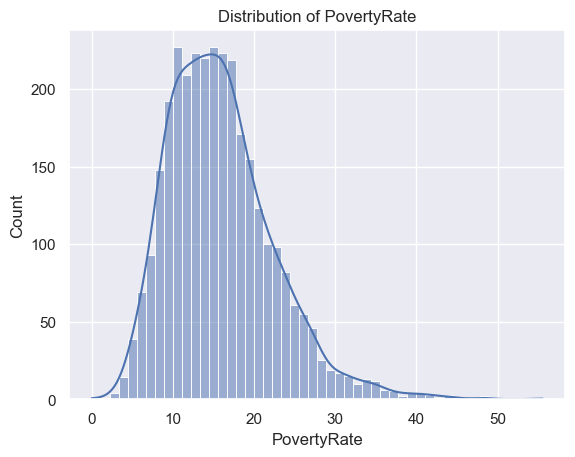

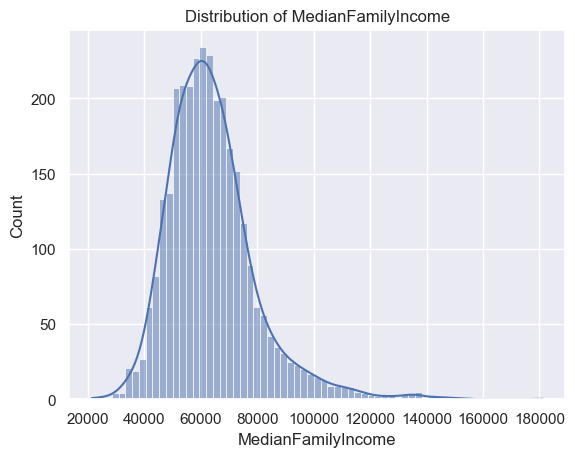

In [92]:
# Distribution of key features
for column in ['PovertyRate', 'MedianFamilyIncome']:
    sns.histplot(county_aggregation[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

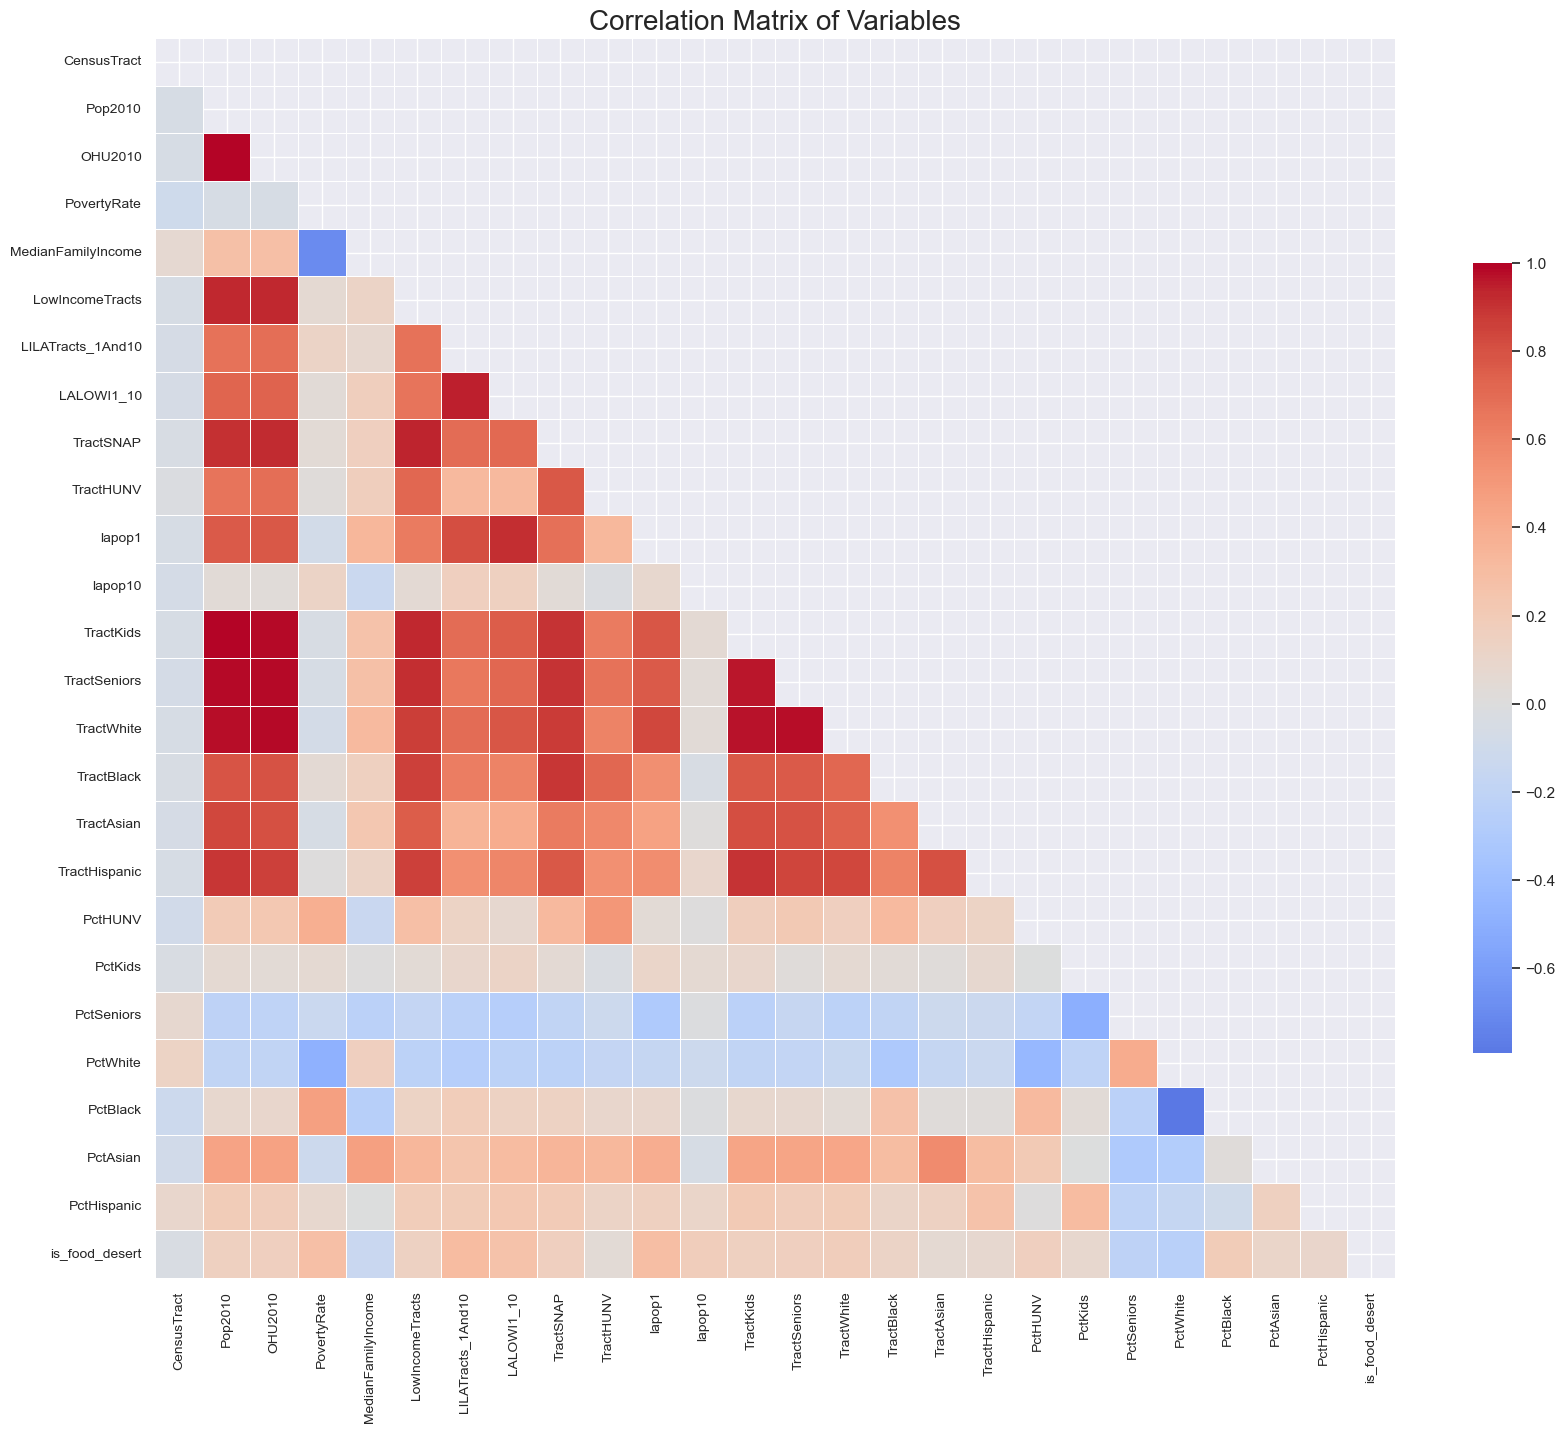

In [93]:
# Drop non-numeric columns
numeric_columns = county_aggregation.select_dtypes(include=['float64', 'int64']).columns
numeric_df = county_aggregation[numeric_columns]

# Generated a mask for the upper triangle
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(20, 20)) 

# Create a heatmap
sns.heatmap(numeric_df.corr(), mask=mask, annot=False, cmap='coolwarm', 
            vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},
            fmt=".2f", ax=ax) #Ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Improve the layout
plt.subplots_adjust(top=0.9)
plt.title('Correlation Matrix of Variables', fontsize=20)
ax.tick_params(labelsize=10) 

plt.show()

#### Interpretation of Results
##### Distribution of Poverty Rate
The histogram of Poverty Rate shows a right-skewed distribution, indicating that a majority of counties have lower poverty rates, with fewer counties experiencing high poverty rates.

##### Heatmap Interpretation
This heatmap displays the lower half of the correlation matrix for the variables in the county_aggregation dataset. Displaying only the lower half as the matrix is symmetrical and the upper half would provide redundant information.

#### Color Interpretation: 
The color scale ranges from dark red (strong positive correlation) to dark blue (strong negative correlation). Lighter colors indicate weaker correlations.

#### Interpreting Correlations: 
The strong correlations are indicated by darker shades. For example, if two variables show a dark red color, they have a strong positive correlation, suggesting that as one increases, the other also tends to increase.

- Diagonal:
The diagonal line, which is not shown, represents the correlation of each variable with itself, which would always be 1.

This visualization helps quickly identify relationships that are worth investigating further through more detailed statistical analysis, while keeping the chart uncluttered by omitting the redundant upper half of the matrix.

## Data Visualizations:

Median Family Income Distribution:
This histogram illustrates the distribution of Median Family Income across all counties. A red dashed line marks the mean income, aiding in assessing how many counties are above or below the mean at a glance.

Poverty Rates vs. Low-Access Indicators:
This scatter plot explores the relationship between Poverty Rates and Low-Access Indicators across counties. Each point is color-coded based on Median Family Income and sized proportionally to the population in 2010, providing a comprehensive view of the data.

State-wise Low-Income and Low-Access Tracts:
The bar plot below presents the prevalence of low-income and low-access tracts aggregated by state. States are sorted by the number of low-access tracts, highlighting those with the highest prevalence of these tracts.

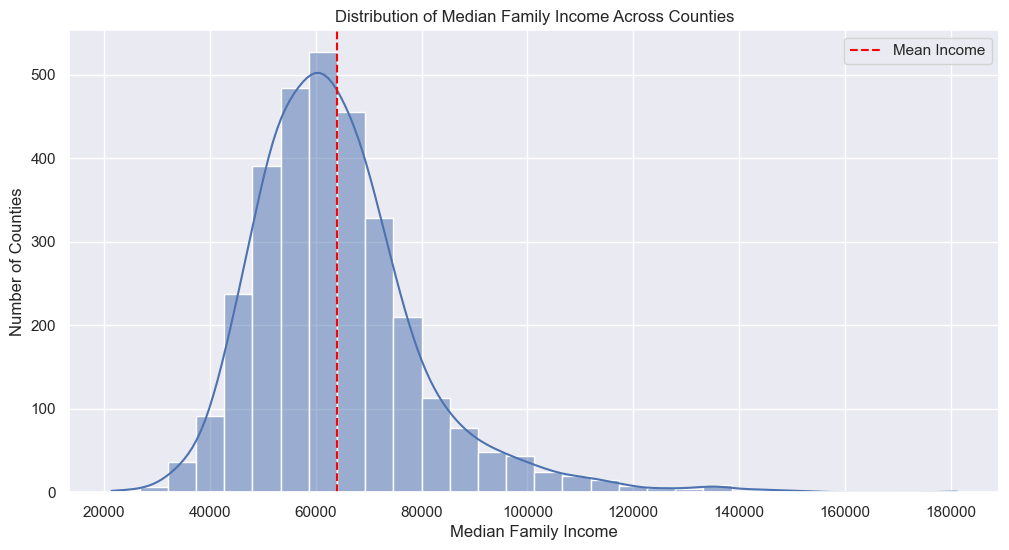

In [94]:
# Visualization 1: Distribution of Median Family Income across Counties
plt.figure(figsize=(12, 6))
sns.histplot(county_aggregation['MedianFamilyIncome'], bins=30, kde=True, palette='viridis')
plt.title('Distribution of Median Family Income Across Counties')
plt.xlabel('Median Family Income')
plt.ylabel('Number of Counties')
plt.axvline(county['MedianFamilyIncome'].mean(), color='red', linestyle='--', label='Mean Income')
plt.legend()
plt.show()

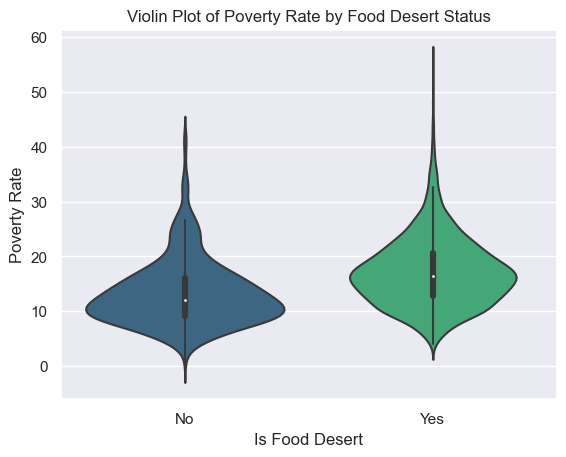

In [95]:
# Visualization 2: Relationship between Poverty Rates and Food Deserts across Counties
sns.violinplot(x='is_food_desert', y='PovertyRate', data=county_aggregation, palette='viridis')
plt.title('Violin Plot of Poverty Rate by Food Desert Status')
plt.xlabel('Is Food Desert')
plt.ylabel('Poverty Rate')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

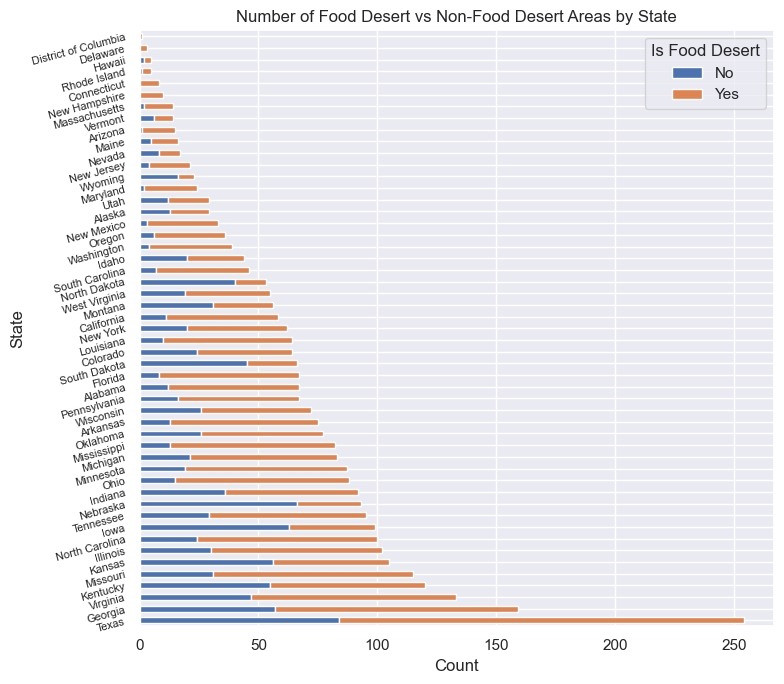

In [124]:
# Visualization 3: Horizontal Bar Chart of Food Desert Counts by State

food_desert_counts = county_aggregation.groupby('State')['is_food_desert'].value_counts().unstack()

# Calculate the total number of areas (food desert and non-food desert) for each state
food_desert_counts['Total'] = food_desert_counts.sum(axis=1)

# Sort the DataFrame based on the 'Total' column, in descending order
food_desert_counts_sorted = food_desert_counts.sort_values(by='Total', ascending=False)

# Drop the 'Total' column
food_desert_counts_sorted = food_desert_counts_sorted.drop(columns='Total')

food_desert_counts_sorted.plot(kind='barh', stacked=True, figsize= (8, 7))
plt.title('Number of Food Desert vs Non-Food Desert Areas by State')
plt.xlabel('Count', fontsize=12)
plt.ylabel('State')
plt.yticks(fontsize=8, rotation=15)
plt.legend(title='Is Food Desert', labels=['No', 'Yes'])
plt.tight_layout()
plt.show();

## Interpretation of Results:

- Median Family Income Distribution Across Counties:
The histogram provides insights into the distribution of median family incomes across counties. A roughly normal distribution suggests a relatively even spread of income levels. The red dashed line indicates the mean income, aiding in identifying counties with incomes significantly above or below the average. This visualization sheds light on economic disparities among counties.

- Relationship Between Poverty Rates and Food Desert Status:
The violin plot visually compares the distribution of poverty rates between counties classified as food deserts ("Yes") and those that are not ("No"). Key observations include:

Both categories exhibit a wide range of poverty rates, indicating economic variability.
Non-food desert areas show a slightly narrower distribution, suggesting less variability in poverty rates.
Food desert areas display a broader spread, implying greater economic disparity within these regions.
The thickest sections of the violins represent the most common poverty rate values, with food desert areas showing a notable presence at higher poverty rates.
Both categories exhibit tails at the upper end of the poverty rate spectrum, with food desert areas showing a more pronounced tail, indicating counties with very high poverty rates.

- Prevalence of Food Deserts and Non-Food Deserts by State:
The bar plot ranks states based on the prevalence of food deserts and non-food deserts, offering insight into food access challenges across states. Texas, Georgia, and Virginia emerge with the highest numbers of such tracts. Considering population size, interventions for improving food accessibility may be particularly crucial in these states. This visualization serves as a starting point for further state-level analysis, acknowledging the influence of population size on the prevalence of food deserts.

In [98]:
#will use this df for modeling
county_aggregation.to_csv('../csv_data/county_aggr.csv')

#### More EDA with merged dataset

In [99]:
#food data and health data together
df = pd.read_csv('../csv_data/final_df.csv')

In [100]:
df.shape

(27210, 68)

In [102]:
df.dtypes

TractFIPS                        int64
StateAbbr                       object
PlaceName                       object
PlaceFIPS                        int64
Place_TractID                   object
                                ...   
PovertyRate_Percentage         float64
MedianFamilyIncome_Log         float64
Urban                            int64
HealthDisparity_Black_White    float64
HealthcareAccessibility        float64
Length: 68, dtype: object

In [103]:
df.head()

,TractFIPS,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,...,Longitude,Mean_PREV,PopulationDensity,Percent_Kids,Percent_Seniors,PovertyRate_Percentage,MedianFamilyIncome_Log,Urban,HealthDisparity_Black_White,HealthcareAccessibility
0,1073000100,AL,Birmingham,107000,0107000-01073000100,3042,24.4,31.2,10.3,47.7,...,-86.7228323926),21.966667,1.035046,0.313281,0.075937,3974.557865,10.376829,1,1854.0,0.107489
1,1073000300,AL,Birmingham,107000,0107000-01073000300,2735,30.4,30.5,10.5,48.2,...,-86.7524339780),23.800000,1.220437,0.255210,0.072029,4702.534920,9.900884,1,1212.0,0.157513
2,1073000400,AL,Birmingham,107000,0107000-01073000400,3338,24.7,31.5,10.4,49.1,...,-86.7640474064),22.200000,1.045412,0.271120,0.095267,3263.684520,10.423144,1,2671.0,0.120488
3,1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.2,35.0,9.1,54.1,...,-86.7749130719),23.100000,1.034682,0.226257,0.145601,3036.614041,10.572521,1,2601.0,0.065969
4,1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.0,36.3,7.6,56.5,...,-86.8016893706),24.300000,1.010192,0.346139,0.126504,5907.434402,9.649240,0,2526.0,0.117886


In [104]:
df.columns

Index(['TractFIPS', 'StateAbbr', 'PlaceName', 'PlaceFIPS', 'Place_TractID',
       'Population2010', 'ACCESS2_CrudePrev', 'ARTHRITIS_CrudePrev',
       'BINGE_CrudePrev', 'BPHIGH_CrudePrev', 'BPMED_CrudePrev',
       'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'CHD_CrudePrev',
       'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev',
       'COPD_CrudePrev', 'COREM_CrudePrev', 'COREW_CrudePrev',
       'CSMOKING_CrudePrev', 'DENTAL_CrudePrev', 'DIABETES_CrudePrev',
       'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev', 'LPA_CrudePrev',
       'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev', 'OBESITY_CrudePrev',
       'PAPTEST_CrudePrev', 'PHLTH_CrudePrev', 'SLEEP_CrudePrev',
       'STROKE_CrudePrev', 'TEETHLOST_CrudePrev', 'Geolocation', 'OHU2010',
       'PovertyRate', 'MedianFamilyIncome', 'TractKids', 'TractSeniors',
       'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN',
       'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP', 'target',
       'Per

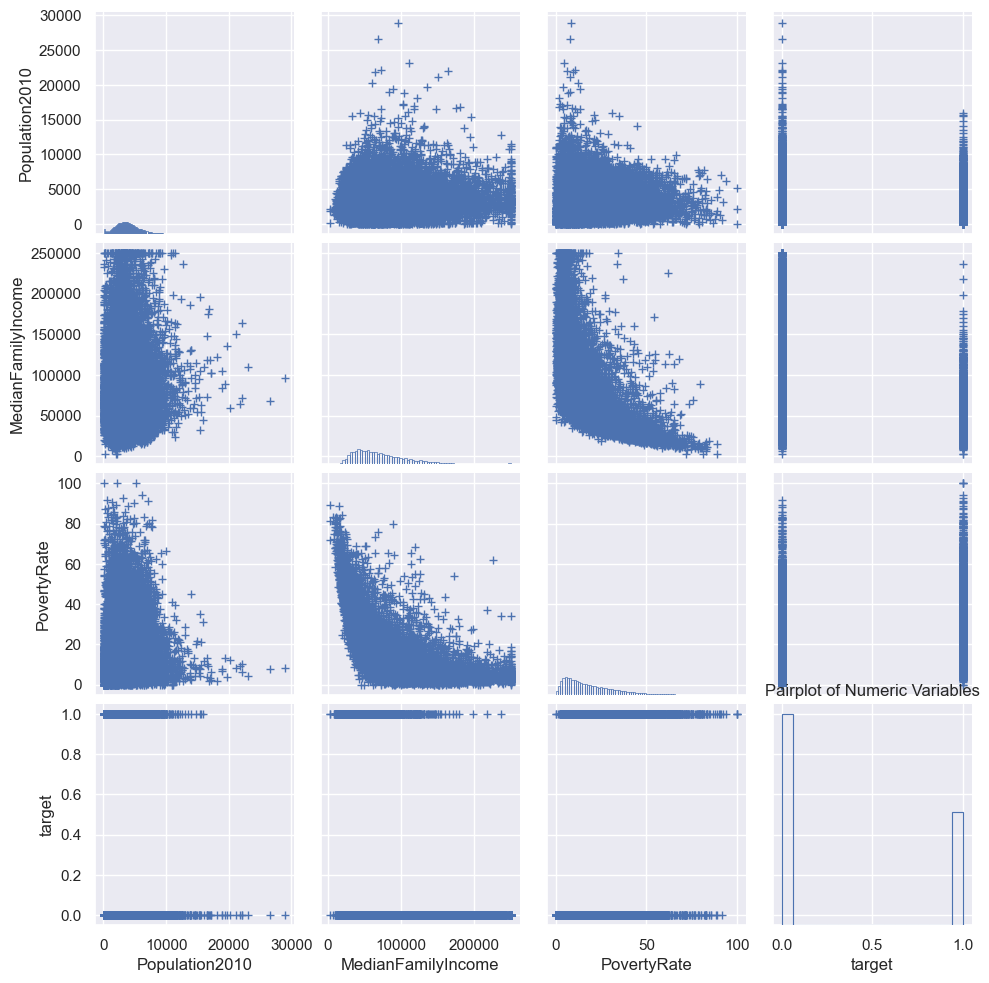

In [105]:
# Pairplot to visualize pairwise relationships in the dataset
sns.pairplot(df[['Population2010', 'MedianFamilyIncome', 'PovertyRate', 'target']],
            plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))
plt.title('Pairplot of Numeric Variables')
plt.show()

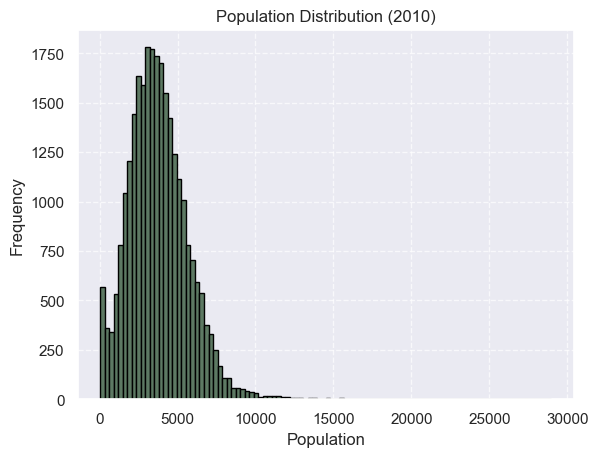

In [108]:
# Population Distribution - Histogram
plt.hist(df['Population2010'], bins=100, color= color, edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution (2010)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

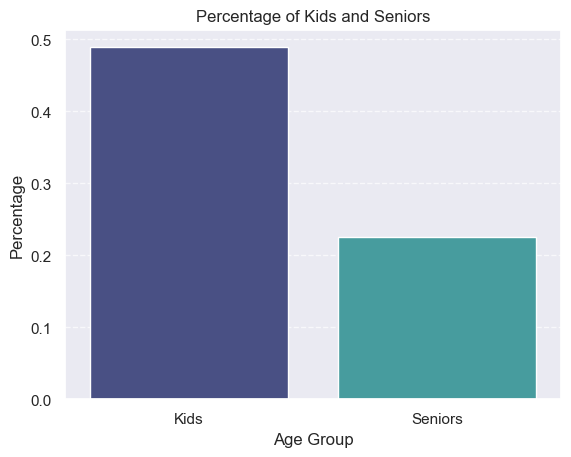

In [109]:
# Bar Plot for Age group
age_groups = ['Kids', 'Seniors']
percentages = [df['Percent_Kids'].mean(), df['Percent_Seniors'].mean()]

# Bar Plot
sns.barplot(x=age_groups, y=percentages, palette='mako')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of Kids and Seniors')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

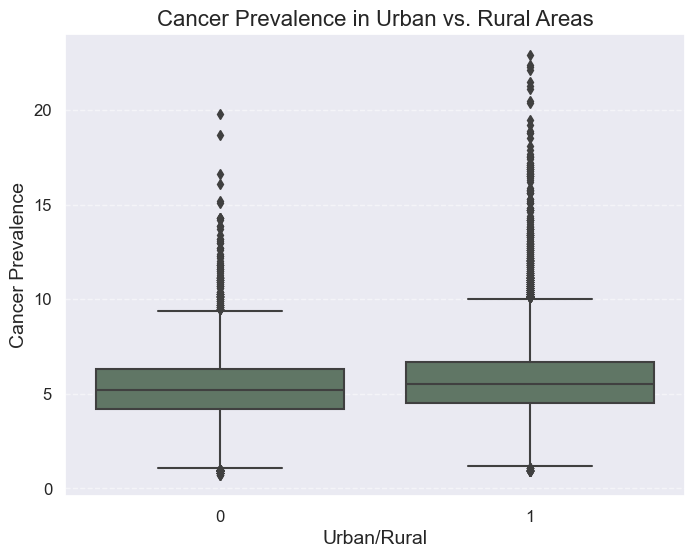

In [111]:
# Urban vs. Rural Comparison - Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Urban', y='CANCER_CrudePrev', data=df, palette=[color, color])
plt.xlabel('Urban/Rural', fontsize=14)
plt.ylabel('Cancer Prevalence', fontsize=14)
plt.title('Cancer Prevalence in Urban vs. Rural Areas', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

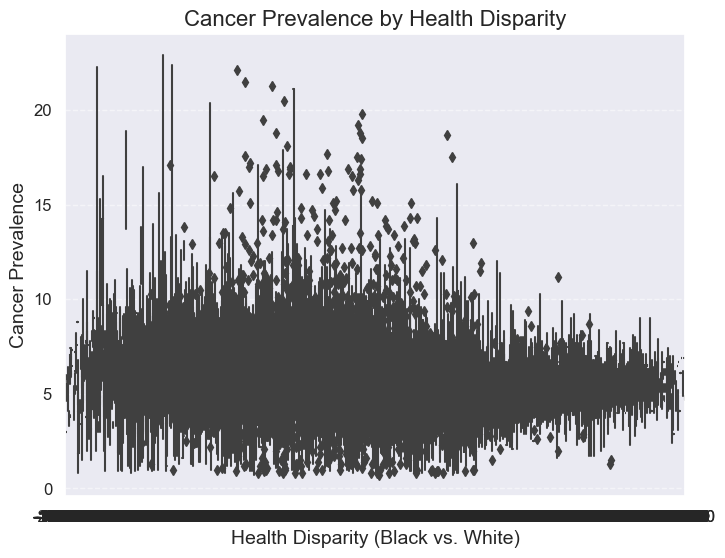

In [112]:
# Health Disparities - Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='HealthDisparity_Black_White', y='CANCER_CrudePrev', data=df, palette=[color, color])
plt.xlabel('Health Disparity (Black vs. White)', fontsize=14)
plt.ylabel('Cancer Prevalence', fontsize=14)
plt.title('Cancer Prevalence by Health Disparity', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()